<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padding_height, padding_width = image.shape

  output_height = (padding_height - kernel_height) // stride + 1
  output_width = (padding_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [4]:
# Load citra yang akan diproses dan ubah menjadi citra keabuan

img_m = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

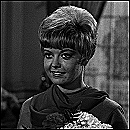

In [21]:
# Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening sebagai berikut:

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:


Emboss

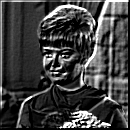

In [23]:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])
cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

Left Sobel Detection

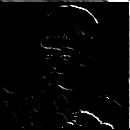

In [24]:
kernel_sobel = np.array([[-1,-2,-1],
                         [2,0,-2],
                         [1,0,1]])

cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))


Canny
Edge
Detection

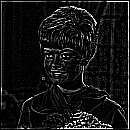

In [25]:
kernel_edge = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

Prewitt
Edge
Detection

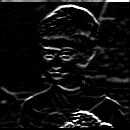

In [26]:
kernel_prewitt = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])

cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

5x5
Gaussian
Blur

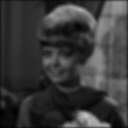

In [27]:
kernel_size = 5
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

21x21
Gaussian
Blur

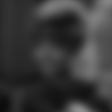

In [28]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))